# Restricted Boltzmann Machine


## 1. Introducción

Los algoritmos conocidos como RBM corresponden a modelos gráficos probabilísticos no dirigidos. Esta contiene una primera capa de unidades visibles y otra capa con unidades invisibles. Una de las razones de por qué es restringida es porque no hay conexiones entre unidades en la misma capa. Originalmente en las máquinas de Boltzmann todas las unidades estaban interconectadas, pero esto es computacionalmente muy complejo dada la exponencialidad de las relaciones.

## 2. Repaso básico de conceptos

### 2.1. Distribución de probabilidad de Bernouilli

Un proceso Bernouilli es aquel en que el espacio muestral solo comprende dos resultados discretos y mutuamente exclusivos en un solo experimento. Esta distribución corresponde a un caso especial de la distribución binomial (la cual comprende varios experimentos). Los resultados pueden significar varias cosas: Éxito y Fracaso, Cara o Sello, 1 o 0, Positivo o Negativo, etc. Para ilustrar este proceso utilizaremos la variable aleatoria $Y$. Esta distribución está dominada por un único parámetro $p$, tal que su función de probabilidad:

$$ P(X = x_i) = p^{x_i} (1-p)^{1-x_i};                    \quad 0\leq p \leq1, \quad\forall x_i \in \{0,1\} $$

## 4. Modelo

Dentro de la estructura hay $n$ nodos visibles que representan a variables aleatorias observables, y $d$ nodos invisibles que representan a variables aleatorias latentes. Cada nodo visible posee conexiones con todas los nodos invisibles (es decir, no son independientes). Cada nodo invisible está conectado con todos los nodos visibles.

![img1](rbm1.png)

### 4.1. Función de probabilidad conjunta

Dado el vector de unidades visibles y el vector de unidades invisibles, tenemos la siguiente distribución de probabilidad conjunta:

$$ p(\boldsymbol{v},\boldsymbol{h}) = \frac{1}{Z}e^{-E(\boldsymbol{v},\boldsymbol{h})} \tag{1.1}$$

Donde $E(\boldsymbol{v},\boldsymbol{h})$ es la función de energía. En la definición de la función energía tenemos el vector de unidades visibles $\boldsymbol{v}$, el vector de unidades invisibles $\boldsymbol{h}$, la matriz de pesos $W$, y los vectores de sesgos $b$ y $c$. Cabe destacar que tanto la variable visible como la latente solo pueden tomar valores binarios como resultados. 

$$ E(\boldsymbol{v},\boldsymbol{h}) = -\boldsymbol{b}^T \boldsymbol{v}-\boldsymbol{c}^T \boldsymbol{h} - \boldsymbol{v}^T W \boldsymbol{h} \tag{1.2}  $$

$$ E(\boldsymbol{v},\boldsymbol{h}) = \sum_{k} v_{k} b_{k} - \sum_{j} c_{j} h_{j} - \sum_{k} \sum_{j} W_{jk} h_{j} v_{k} $$ 


Además como estamos hablando de una distribución se debe normalizar con la constante $Z$:

$$ Z = \sum_{\boldsymbol{v}} \sum_{\boldsymbol{h}} e^{-E(\boldsymbol{v},\boldsymbol{h})} \tag{1.3} $$

### 4.2. Probabilidades condicionales

El punto es este último término, el cual recoge todas las combinaciones posibles de la variable observable y latente, lo cual es muy difícil de realizar analíticamente. Esto supone un obstáculo para obtener la distribución de probabilidad conjunta. De esta manera es más manejable obtener muestras de la distribución de probilidad condicionada. Según Bayes tenemos que la probabilidad de $\boldsymbol{h}$ dado el vector de variables observadas $\boldsymbol{v}$:

$$ p(\boldsymbol{h}|\boldsymbol{v}) = \frac{p(\boldsymbol{v},\boldsymbol{h})}{p(\boldsymbol{v})} = 
\frac{p(\boldsymbol{v},\boldsymbol{h})}{\sum_{h} p(\boldsymbol{v},\boldsymbol{h}) } \tag{1.4} $$


$$ p(\boldsymbol{h}|\boldsymbol{v}) = \frac{\frac{1}{Z} e^{\boldsymbol{b}^T \boldsymbol{v}+\boldsymbol{c}^T \boldsymbol{h} + \boldsymbol{v}^T W \boldsymbol{h}}}{\sum_{h} \frac{1}{Z} e^{\boldsymbol{b}^T \boldsymbol{v}+\boldsymbol{c}^T \boldsymbol{h} + \boldsymbol{v}^T W \boldsymbol{h}}} $$

$$ p(\boldsymbol{h}|\boldsymbol{v}) = \frac{e^{\boldsymbol{c}^T \boldsymbol{h} + \boldsymbol{v}^T W \boldsymbol{h}}}{\sum_{h} e^{\boldsymbol{c}^T \boldsymbol{h} + \boldsymbol{v}^T W \boldsymbol{h}}} $$

$$ p(\boldsymbol{h}|\boldsymbol{v}) = \frac{1}{Z'} e^{\boldsymbol{c}^T \boldsymbol{h} + \boldsymbol{v}^T W \boldsymbol{h}} $$

$$ p(\boldsymbol{h}|\boldsymbol{v}) = \frac{1}{Z'} exp\left\{\sum_{j=1}^{n} c_{j} h_{j} + \sum_{j=1}^{n} \boldsymbol{v}^T W_{:j} h_{j}\right\} $$

$$ p(\boldsymbol{h}|\boldsymbol{v}) = \frac{1}{Z'} \prod_{j=1}^{n} exp\left\{c_{j} h_{j} + \boldsymbol{v}^T W_{:j} h_{j}\right\} \tag{1.5}  $$


En la última ecuación (1.5) se desprende un resultado muy importante ya que dice implícitamente la propiedad de independencia. Si se observa $\boldsymbol{v}$ entonces los elementos de $\boldsymbol{h}$ son independientes. Naturalmente esto es una consecuencia del modelo gráfico, ya que los nodos no tienen conexiones entre ellos en una misma capa. 
Ahora si queremos computar la probabilidad de que una sola unidad se active dado que observamos los nodos visibles (recordatorio: los nodos son binarios!).

$$ p(h_{j} = 1|\boldsymbol{v}) = \frac{p(h_{j}=1,\boldsymbol{v})}{\sum_{h_{j}} p(h_{j},\boldsymbol{v})} $$

$$ p(h_{j} = 1|\boldsymbol{v}) = \frac{p(h_{j}=1,\boldsymbol{v})}{p(h_{j} = 1,\boldsymbol{v})+p(h_{j} = 0,\boldsymbol{v})} $$

$$ p(h_{j} = 1|\boldsymbol{v}) = \frac{exp\left\{c_{j}+\boldsymbol{v}^T W_{:j}\right\}}{exp\left\{0\right\} + exp\left\{c_{j}+\boldsymbol{v}^T W_{:j}\right\} } $$

Esta última ecuación corresponde a una ya conocida función que se llama sigmoide, cuya expresión se muestra abajo.

$$ \sigma(x) = \frac{1}{1 + e^{-x}}$$

De esta manera las probabilidades condicionadas $p(\boldsymbol{h}|\boldsymbol{v})$ es simplemente la función sigmoide de su argumento. Se puede demostrar lo mismo de $p(\boldsymbol{v}|\boldsymbol{h})$.

$$ p(\boldsymbol{h}|\boldsymbol{v}) = \prod_{j=1}^{n} \sigma\left(c_{j} + \boldsymbol{v}^T W_{:j}\right) $$

$$ p(\boldsymbol{v}|\boldsymbol{h}) = \prod_{i=1}^{d} \sigma\left(b_{i} + W_{i:} \boldsymbol{h}\right) $$

De esta manera se puede muestrear fácilmente el vector $h$ dado que observamos $v$ y similarmente se puede muestrear $v$ dado que tenemos el vector $h$.

### 4.3. Máxima verosimilitud

El objetivo es obtener los parámetros $W$, $b$ y $c$. El método clásico es analizar su función de verosimilitud con objeto de maximizarla. Sean $n$ las observaciones que se disponen, entonces la verosimilitud es:

$$ \mathcal{L}(W,b,c) = \sum_{t=1}^{n} \ln{p(v^{(t)})} = \sum_{t=1}^{n} \ln{\sum_{h}p(v^{(t)},h)} $$

$$ \mathcal{L}(W,b,c) = \sum_{t=1}^{n} \ln{p(v^{(t)})} = \sum_{t=1}^{n} \ln{\sum_{h} \frac{1}{Z}\exp{\{-E(v^{(t)},h}\}} $$

$$ \mathcal{L}(W,b,c) = \sum_{t=1}^{n} \ln{\sum_{h} \exp{\{-E(v^{(t)},h}\}} - n\ln{Z} $$

$$ \mathcal{L}(W,b,c) = \sum_{t=1}^{n} \ln{\sum_{h} \exp{\{-E(v^{(t)},h}\}} - n\ln{\sum_{v}\sum_{h} \exp{\{-E(v,h)\}}} $$

Sean los parametros $\theta = \{W,b,c\}$ entonces se debe maximizar la función de verosimilitud.

$$ \nabla_{\theta} \mathcal{L}(\theta) = \nabla_{\theta}\sum_{t=1}^{n} \ln{\sum_{h} \exp{\{-E(v^{(t)},h}\}} - n\nabla_{\theta}\ln{\sum_{v}\sum_{h} \exp{\{-E(v,h)\}}} $$

Utilizando las propiedades de la derivada del logaritmo entonces se tiene.

$$ \nabla_{\theta} \mathcal{L}(\theta) = \sum_{t=1}^{n} \frac{\sum_{h}\exp{\{-E(v^{(t)},h)\}}\nabla_{\theta}{\{-E(v^{(t)},h)}\}}{\sum_{h}\exp{\{-E(v^{(t)},h)\}}}-n\frac{\sum_{v}\sum_{h}\exp{\{-E(v,h)\}}\nabla_{\theta}\{-E(v,h)\}}{\sum_{v}\sum_{h}\exp{\{-E(v,h)\}}} $$

La anterior expresión solo es una ponderación sobre el gradiente $\nabla_{\theta}$, entonces podemos reescribir la ecuación en términos de esperanza matemática.

$$\nabla_{\theta} \mathcal{L}(\theta) = \sum_{t=1}^{n} \mathop{\mathbb{E}}_{p(h|v^{(t)})}[\nabla_{\theta}{\{-E(v^{(t)},h)}\}] - n \mathop{\mathbb{E}}_{p(v,h)}[\nabla_{\theta}{\{-E(v,h)}\}]$$

Ahora resolviendo las derivadas parciales para cada parámetro se tiene:

$$ -\frac{\partial E(v,h)}{\partial W} = \frac{\partial}{\partial W}(b^T v + c^T h + v^T W h) = h v^T $$

$$ -\frac{\partial E(v,h)}{\partial b} = \frac{\partial}{\partial W}(b^T v + c^T h + v^T W h) = v $$

$$ -\frac{\partial E(v,h)}{\partial c} = \frac{\partial}{\partial W}(b^T v + c^T h + v^T W h) = h $$

Reemplazando el gradiente y evaluando se tiene.

$$ \frac{\partial \mathcal{L}(W,b,c)}{\partial W} = \sum_{t=1}^{n} \hat{h}^{(t)}v^{(t)T} - n \mathop{\mathbb{E}}_{p(v,h)}[h v^T]  $$

$$ \frac{\partial \mathcal{L}(W,b,c)}{\partial b} = \sum_{t=1}^{n} v^{(t)T} - n \mathop{\mathbb{E}}_{p(v,h)}[v]  $$

$$ \frac{\partial \mathcal{L}(W,b,c)}{\partial c} = \sum_{t=1}^{n} \hat{h}^{(t)} - n \mathop{\mathbb{E}}_{p(v,h)}[h]  $$

Donde $\hat{h}^{(t)}$ es el valor esperado del vector $h$ dado $v^{(t)}$, y que como recordamos es una distribución Bernouilli entonces es simplemente la función cuando el valor de $h$ es 1 o éxito.

$$ \hat{h}^{(t)} = \mathop{\mathbb{E}}_{p(h|v^{(t)})}[h] = \sigma(c + v^{(t)T} W) $$

Determinar el valor esperado sobre $p(v,h)$ tiene el mismo problema que determinar la constante $Z$ sobre todos los valores posibles de $h$ y $v$: es indeterminable y por tanto no se puede maximizar en términos analíticos.

### 4.4. Divergencia contrastiva

Ya que obtener la esperanza matemática de $p(v,h)$ resulta prácticamente inaccesible la idea es aproximar esta componente mediante la utilización de muestreo de Gibbs. El algoritmo CD con $k$ pasos debe obtener un punto estimado $v^{(t)}_{k}$ a partir del ejemplo de entrenamiento $v^{(t)}_{0}$ empleando el muestreo de Gibbs como cadena. Es decir, a partir de $v^{(t)}_{0}$ obtenemos $h^{(t)}_{0}$ muestreando de $p(h|v^{(t)}_{0})$, con lo cual obtenemos $v^{(t)}_{1}$ muestreando desde $p(v|h^{(t)}_{0})$, y así sucesivamente hasta cumplir los $k$ pasos del algoritmo CD, con lo cual se obtiene:

$$ CD(\boldsymbol{\theta}, \boldsymbol{v^{(t)}}_{0}) = \mathop{\mathbb{E}}_{p(h|v^{(t)}_{0})}[\nabla_{\theta}{\{-E(v^{(t)}_{0},h)}\}] - \mathop{\mathbb{E}}_{p(h|v^{(t)}_{k})}[\nabla_{\theta}{\{-E(v^{(t)}_{k},h)}\}]$$

En función de lo anterior tenemos el siguiente gradiente de los parámetros:

$$ \Delta{W} = \boldsymbol{h}^{(t)}_{0} \boldsymbol{v}^{(t)T}_{0} - \boldsymbol{h}^{(t)}_{k+1} \boldsymbol{v}^{(t)T}_{k}  $$

$$ \Delta{b} = \boldsymbol{v}^{(t)}_{0} - \boldsymbol{v}^{(t)}_{k}  $$

$$ \Delta{c} = \boldsymbol{h}^{(t)}_{0} - \boldsymbol{h}^{(t)}_{k+1}  $$





## 5. Programando el modelo

Con el propósito de mostrar el aprendizaje se va a programar el modelo paso a paso. Se utilizarán librerías solo para manejar estructuras y visualizar los datos, y solo se utilizarán funciones (las cuales serán condensadas en una o varias clases en otra instancia).

Primero importamos las dependencias.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Se deben incializar los parámetros según la arquitectura de la red que se establezca, privilegiando operaciones matriciales. Para tal efecto se definen un número de nodos visibles como `n_visibles` y un nodo de nodos invisibles como `n_invisibles`. Luego, los pesos $W$ serán una matriz de flotantes aleatorios uniformemente distribuidos y los umbrales $b$ y $c$ serán vectores aleatorios

In [2]:
def inicializar_parametros(n_visibles, n_invisibles):
    """Inicializa los pesos y umbrales
    
    Parámetros:
    ---------------
    n_visibles : número de nodos visibles
    n_invisibles : número de nodos invisibles
    
    Return:
    ---------------
    W: matriz de pesos (n_visibles x n_invisibles)
    b: vector de umbrales visibles (n_visibles x 1)
    c: vector de umbrales invisibles (n_invisibles x 1)
    """
    
    W = np.random.normal(0, 0.01, size = (n_visibles, n_invisibles))
    b = np.ones(n_visibles)/(1000)
    c = np.zeros(shape = n_invisibles)
    
    return W, b, c

Definimos la función sigmoide de la ecuación $[1]$.

In [3]:
def sigmoide(x):
    """Retorna el valor de la función sigmoide
    
    Parámetros:
    ---------------
    x : escalar, vector o matriz
    
    """
    
    return 1/(1+np.exp(-1*x))

Recordemos que los nodos visibles e invisibles representan variables aleatorias discretas, tal que solo pueden tomar dos valores mutuamente exclusivos y exhaustivos, $0$ y $1$; es decir el valor probabilístico de cada nodo es una distribución $Ber(\theta)$. Para muestrear de esta distribución simplemente nos basaremos en la distribución uniforme como distribución propuesta. También se puede muestrear utilizando `np.random.binomial`.

Con todo esto ya es posible obtener valores aleatorios de las distribuciones condicionales $p(h|v)$ y luego $p(v|h)$. Dado que los nodos son independientes en la misma capa sería posible paralelizar tareas mediante la librería `multiprocessing`, lo cual resultaría en un mejor rendimiento del código. Sin embargo ya que trataremos ejemplos muy sencillos se omitirá

In [4]:
def muestrear_bernoulli(p):
    """Computa muestreos binarios
    
    Parámetros:
    ---------------
    p : vector o matriz de probabilidades de éxito
    
    Return:
    ---------------
    activaciones : vector o matriz de resultados muestrados por Bernoulli
     
    """
    n_estimaciones = p.shape
    uniformes = np.random.random(size = n_estimaciones)
    activaciones = np.where(uniformes <= p, True, False)
    return activaciones

def probabilidades_h_dado_v(v, W, c):
    """Computa valores aleatorios de la distribución p(h|v)
    
    Parámetros:
    ---------------
    v : matriz de nodos visibles (n_ejemplos x n_visibles)
    W : matriz de pesos (n_visibles x n_invisibles)
    c : vector de umbrales de nodos invisibles (n_visibles)
    
    Return:
    ---------------
    probabilidades_h : vector de probabilidades de que h se active (n_ejemplos x n_invisibles)
    """
    probabilidades_h = sigmoide(c + v.dot(W))
    return probabilidades_h
    
def probabilidades_v_dado_h(h, W, b):
    """Computa valores aleatorios binarios de la distribución p(v|h)
    
    Parámetros:
    ---------------
    h : matriz de nodos invisibles (n_ejemplos x n_invisibles)
    W : matriz de pesos (n_visibles x n_invisibles)
    b : umbrales de nodos visibles (n_invisibles)
    
    Return:
    ---------------
    probabilidad_v : vector de probabilidades de que el vector v se active (n_ejemplos x n_visibles)
    
    """
    probabilidades_v = sigmoide(b + (W.dot(h.T)).T)
    return probabilidades_v

Para evitar la sobreescritura de funciones se crea una función que regenere un input utilizando las funciones anteriores

In [5]:
def regenerar(v, W, b, c):
    return probabilidades_v_dado_h(muestrear_bernoulli(probabilidades_h_dado_v(v, W, c)), W, b)

Por último implementamos el algoritmo CD

In [6]:
def divergencia_contrastiva(lote_visibles, W, b, c, k = 1):
    """Computa el gradiente (W, b, c) a través del algoritmo CD
    recibiendo un lote de ejemplos de entrenamiento
    
    Parámetros:
    ---------------
    visible_set : conjunto de ejemplos de entrenamientos
    W : matriz de pesos
    b : vector de umbrales visibles
    c : vector de umbrales invisibles
    k (default = 1) : escalar de pasos para el algoritmo
    
    Return:
    ---------------
    delta_W : matriz de gradientes de los pesos W
    delta_b : vector de gradientes de los umbrales b
    delta_c : vector de gradientes de los umbrales c
    
    """
    
    delta_W = np.zeros(shape = W.shape)
    delta_b = np.zeros(shape = b.shape)
    delta_c = np.zeros(shape = c.shape)
    m = lote_visibles.shape[0]
    
    v0 = lote_visibles
    h0 = probabilidades_h_dado_v(v0, W, c)
    
    muestras_h0 = muestrear_bernoulli(h0)
    
    muestras_hk = muestras_h0.copy()
    
    for k_paso in range(k):
        vk = probabilidades_v_dado_h(muestras_hk, W, b)
        muestras_vk = muestrear_bernoulli(vk)
        
        hk = probabilidades_h_dado_v(muestras_vk, W, c)
        muestras_hk = muestrear_bernoulli(hk)
        
    delta_W = (v0.T.dot(h0) - vk.T.dot(hk))/m
    delta_b = (v0 - vk).sum(axis = 0)/m
    delta_c = (h0 - hk).sum(axis = 0)/m
    
    return delta_W, delta_b, delta_c

Ahora nos ocupamos de entrenar al modelo mediante lotes

In [7]:
def entrenamiento_RBM(set_entrenamiento, W, b, c, lotes = 50, eta = 0.0001, epoca = '-', log_delta_W = True):
    n = set_entrenamiento.shape[0]
    iteraciones = n//lotes
    id_x = np.arange(n)
    np.random.shuffle(id_x)
    for i in range(iteraciones):
        print("Epoca {}: {}%".format(epoca, 100*(i+1)//iteraciones), end = "\r")
        id_lote = id_x[lotes*i:lotes*(i+1)]
        lote = set_entrenamiento[id_lote]
        delta_W, delta_b, delta_c = divergencia_contrastiva(lote, W, b, c, k = 1)
    old_W = W.copy()
    W += eta*delta_W
    b += eta*delta_b
    c += eta*delta_c
    if log_delta_W:
        return W, b, c, np.abs(old_W.mean()-W.mean())
    else:
        return W, b, c

Algunas funciones que serán de utilidad

In [8]:
def vectorizar(X):
    """Convierte una matriz de tamaño (l, m, n) en una
    de tamaño (n x m, l), donde hay l ejemplos de entrenamientos
    
    Parámetros:
    ---------------
    X : matriz (l, m, n)
    
    Return:
    ---------------
    X : matriz (m x n, l)"""
    
    l, m, n = X.shape
    
    return X.reshape(l, m*n)

In [9]:
def mostrar_imagen(vector, ancho, alto):
    """Grafica un vector de tamaño (m x n)"""
    
    vector = vector.reshape(ancho, alto)
    plt.imshow(vector, cmap=plt.get_cmap('gray'))
    plt.show()

## 6. Aplicación en ejemplos

### 6.1. Dígitos MNIST

Aplicaremos el algoritmo RBM como modelo generativo sobre los dígitos manuscritos desde el $0$ al $9$, los datos son el set MNIST. Ya que el modelo se trata de uno no supervisado el objetivo no es predecir de qué número se trata, mas bien la tarea se enfoca en el aprendizaje de la distribución de probabilidad que genera el proceso. Importaremos el dataset de la librería `keras`, que cuenta con 60,000 ejemplos de entrenamientos. Estos deben ser normalizados debidamente para que la red pueda interpretarlos (es decir, los pixeles solo pueden ser $1$ o $0$ para negro o blanco respectivamente).

In [10]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

#Guardamos los pixeles en cada dimensión
ancho, alto = train_X[0].shape

#Luego convertimos cada ejemplo en un vector
train_X, test_X = vectorizar(train_X/255), vectorizar(test_X/255)
train_X = train_X[:10000,:]


In [11]:
print(train_y[2])

4


Ahora mostremos un ejemplo seleccionado al azar.

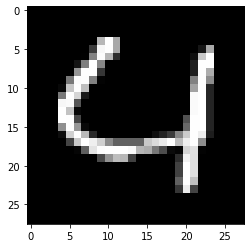

In [12]:
ejemplo_1 = train_X[np.random.randint(low = 0, high = 1000)]
mostrar_imagen(ejemplo_1, ancho, alto)

Inciamos un modelo RBM, este tendrá $28*28$ nodos visibles. Se irán probando nodos invisibles, por el momento empezaremos con $10$. Vale decir, se tendrán 10 nodos invisibles que se encargarán de aprender atríbutos de las imágenes en términos de su distribución conjunta con el vector $\boldsymbol{v}$.

In [13]:
W, b, c = inicializar_parametros(ancho*alto, 250)

Como el modelo no está entrenado, si ingresamos datos y computamos qué es lo que muestra la red a partir de una observación veremos que solo genera ruido aleatorio.

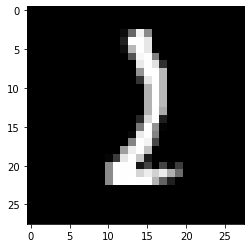

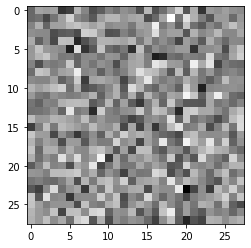

In [14]:
ejemplo_2 = train_X[np.random.randint(low = 0, high = 1000)]
ejemplo_2_regenerado = regenerar(ejemplo_2, W, b, c)
mostrar_imagen(ejemplo_2, ancho, alto)
mostrar_imagen(ejemplo_2_regenerado, ancho, alto)


Con la red ya establecida se procede a entrenarla con los datos, utilizando lotes de 50 ejemplos.

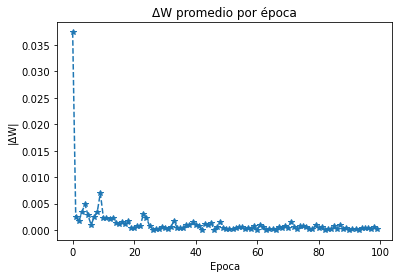

In [23]:
W, b, c = inicializar_parametros(ancho*alto, 200)
log_delta_W = []
for epoca in range(100):
    W, b, c, promedio_delta_W  = entrenamiento_RBM(train_X, W, b, c, lotes = 25, eta = 0.2, epoca = epoca)
    log_delta_W.append([epoca,promedio_delta_W])
log_delta_W = np.array(log_delta_W)
plt.plot(log_delta_W[:,0], log_delta_W[:,1], marker = '*', linestyle = 'dashed')
plt.xlabel('Epoca')
plt.ylabel('|ΔW|')
plt.title('ΔW promedio por época')
plt.show()

Con esto probamos qué genera el modelo dado un ejemplo de entrenamiento. En la columna izquierda pueden verse los ejemplos del MNIST originales, y en la derecha los regenerados a partir de estos.

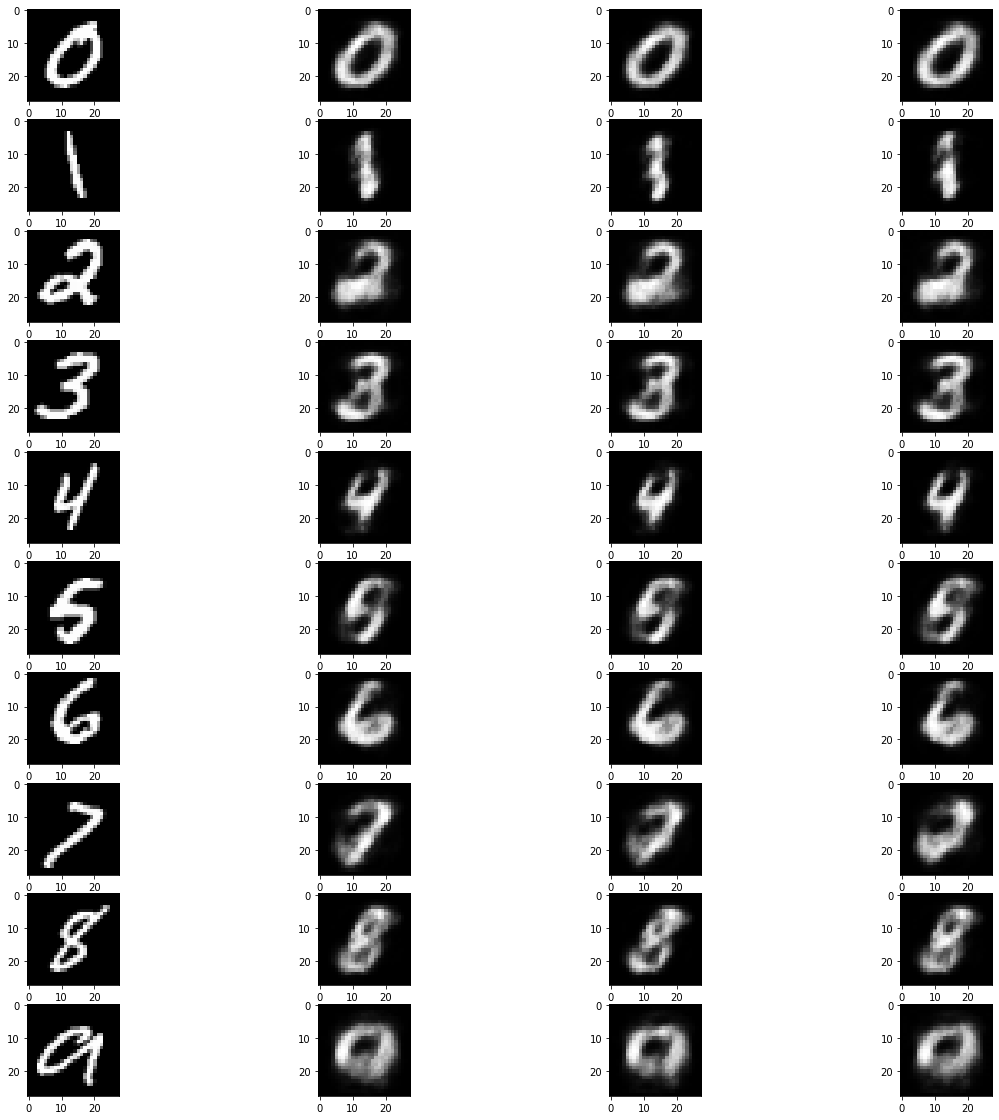

In [33]:
fig, ax = plt.subplots(nrows = 10, ncols = 4, figsize = (20, 20))
ejemplos = np.array([train_X[np.where(train_y == i)[0][np.random.randint(0, high = 100)]] for i in range(10)])
for l in range(10):
    ejemplo = ejemplos[l,:]
    ax[l, 0].imshow(ejemplo.reshape(28,28), cmap = plt.get_cmap('gray'))
    for m in range(1,4):
        ejemplo_regenerado = regenerar(ejemplo, W, b, c).reshape(28,28)
        ax[l,m].imshow(ejemplo_regenerado, cmap = plt.get_cmap('gray'))
plt.show()